In [14]:
import numpy as np

import pandas as pd

import seaborn as sns 

import matplotlib.pyplot as plt 

import datetime

# LOAD OF DATA 

In [15]:
df = pd.read_csv("energyst.csv")

In [16]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power,Leading_Current_Reactive_Power,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01-01-2018 00:15,3.17,2.95,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01-01-2018 00:30,4.00,4.46,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01-01-2018 00:45,3.24,3.28,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01-01-2018 01:00,3.31,3.56,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01-01-2018 01:15,3.82,4.50,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [17]:
df.isnull().sum()

date                              0
Usage_kWh                         0
Lagging_Current_Reactive.Power    0
Leading_Current_Reactive_Power    0
Lagging_Current_Power_Factor      0
Leading_Current_Power_Factor      0
NSM                               0
WeekStatus                        0
Day_of_week                       0
Load_Type                         0
dtype: int64

# CORELATION COFF

C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_1048\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

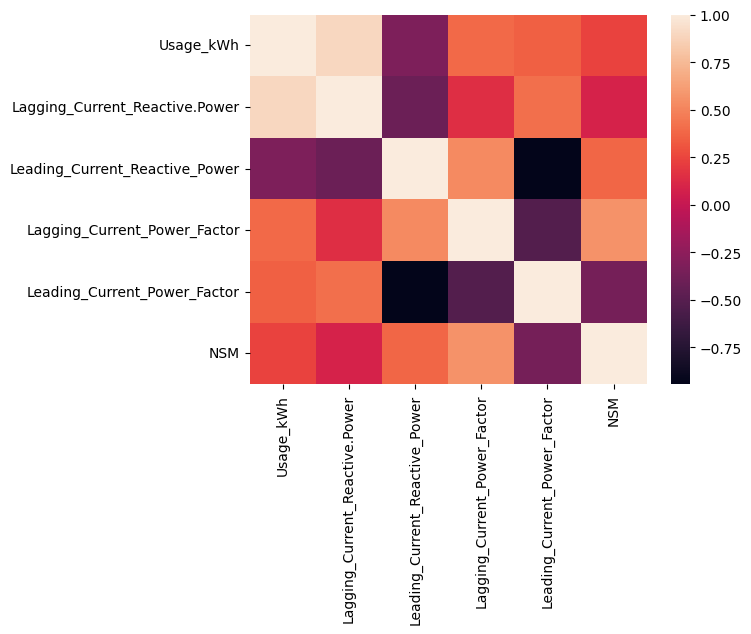

In [18]:
sns.heatmap(df.corr())

In [19]:
df.corr()

C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_1048\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Usage_kWh,Lagging_Current_Reactive.Power,Leading_Current_Reactive_Power,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power,0.896150,1.000000,-0.405142,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power,-0.324922,-0.405142,1.000000,0.526770,-0.944039,0.371605
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.565270,-0.360563,1.000000


The use of titanium as a near surface mounted (NSM) reinforcing material has been proposed. This study assesses the effects of coupling 6Al-4V titanium and ASTM A615 black steel in NSM applications. In order to place the use of titanium in context, duplicate specimens having stainless steel and CFRP NSM bars are also tested. Sixty-two concrete prisms were tested, each having a single embedded #4 ASTM A615 (Grade 60) black steel bar. A 12.7 mm diameter titanium (Ti), CFRP or 2205 stainless steel (SS) NSM bar is embedded along one side of the concrete prism into NSM ‘slots’. Specimens were conditioned in a cyclic temperature and humidity environment for two years during which half-cell potential (ASTM C876) and macrocouple current (ASTM G102) were monitored. Following conditioning, all steel bars were removed and mass loss due to corrosion determined. The comparison of interest in this study is as follows: does the presence of titanium accelerate or result in greater steel corrosion than other materials coupled with mild reinforcing steel; that is, does a more aggressive galvanic cell develop? For the conditions tested, corrosion was present in all specimens. There was no evidence that the presence of 6Al-4V titanium reinforcing bars in close proximity to (or in electrical contact with) A615 steel reinforcing bars results in any change in the rate or nature of corrosion.

In [20]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power,Leading_Current_Reactive_Power,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,100.000000,100.000000,85500.000000


# removal of outliers 

In [21]:
df["Load_Type"].unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [22]:
df["Day_of_week"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)


# NSM Distribution Over KW

<Axes: xlabel='NSM', ylabel='Usage_kWh'>

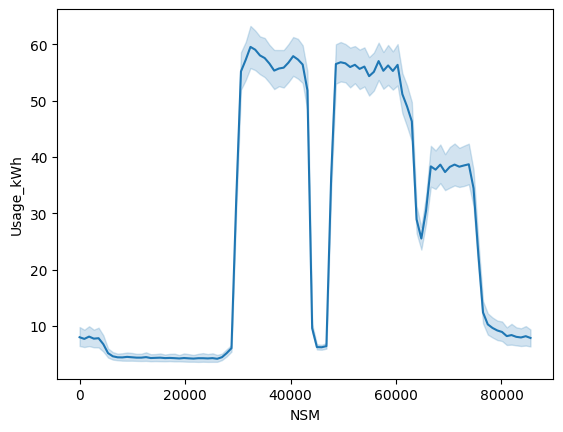

In [23]:
sns.lineplot(x = df["NSM"] , y = df["Usage_kWh"])

# NSM distribution over load type

<Axes: xlabel='Load_Type', ylabel='NSM'>

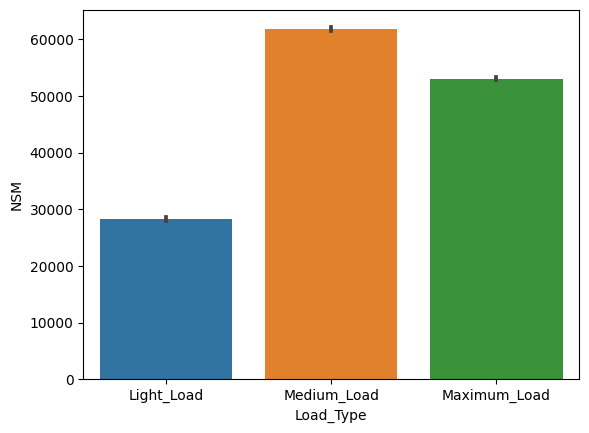

In [25]:
sns.barplot(x = df["Load_Type"] , y = df["NSM"])

<Axes: xlabel='Load_Type', ylabel='Lagging_Current_Reactive.Power'>

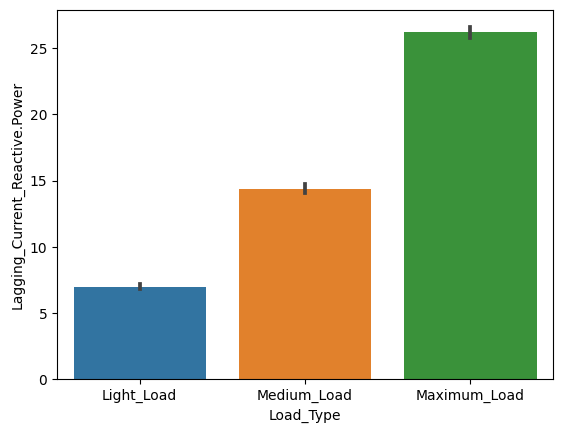

In [28]:
sns.barplot(x = df["Load_Type"] , y = df["Lagging_Current_Reactive.Power"])

<Axes: xlabel='Load_Type', ylabel='Leading_Current_Reactive_Power'>

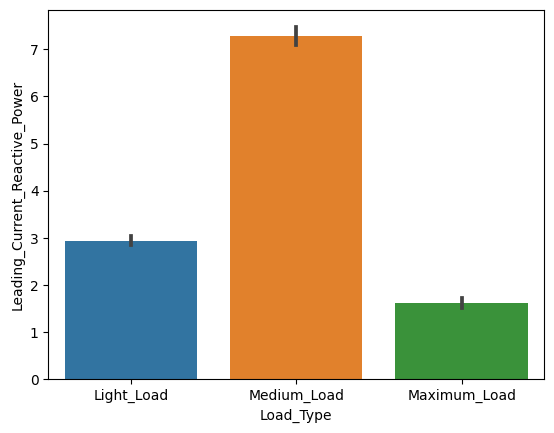

In [30]:
sns.barplot(x = df["Load_Type"] , y = df["Leading_Current_Reactive_Power"])

<Axes: xlabel='Load_Type', ylabel='Lagging_Current_Power_Factor'>

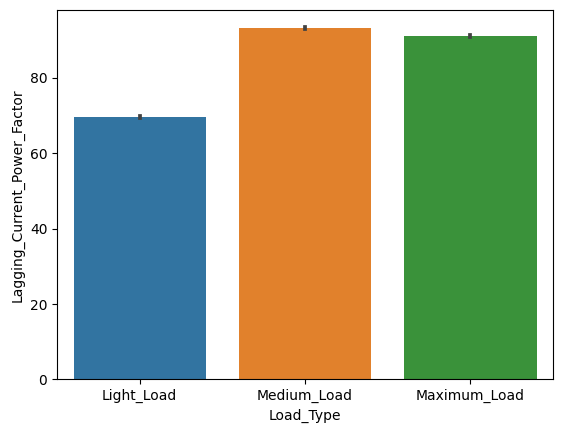

In [31]:
sns.barplot(x = df["Load_Type"] , y = df["Lagging_Current_Power_Factor"])

<Axes: xlabel='Load_Type', ylabel='Leading_Current_Power_Factor'>

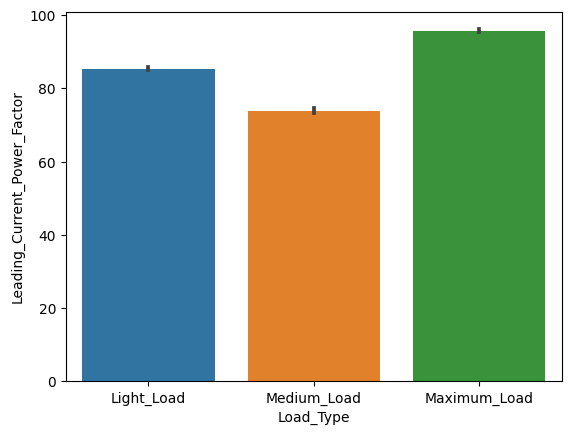

In [32]:
sns.barplot(x = df["Load_Type"] , y = df["Leading_Current_Power_Factor"])

<Axes: xlabel='Day_of_week', ylabel='NSM'>

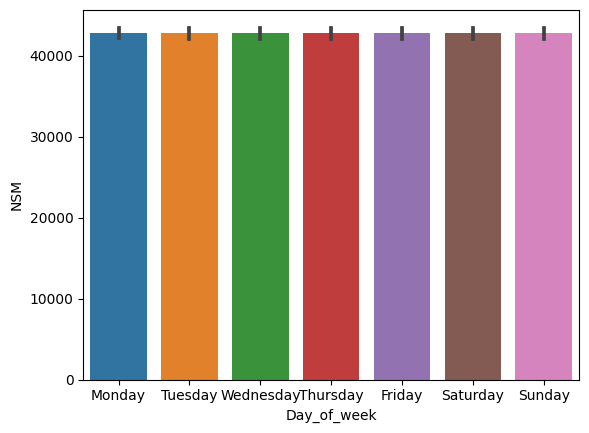

In [33]:
sns.barplot(x = df["Day_of_week"] , y = df["NSM"])

<Axes: xlabel='Day_of_week', ylabel='Leading_Current_Power_Factor'>

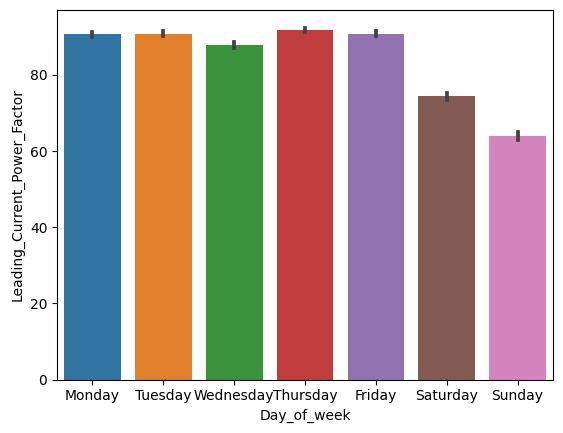

In [34]:
sns.barplot(x = df["Day_of_week"] , y = df["Leading_Current_Power_Factor"])

<Axes: xlabel='Day_of_week', ylabel='Usage_kWh'>

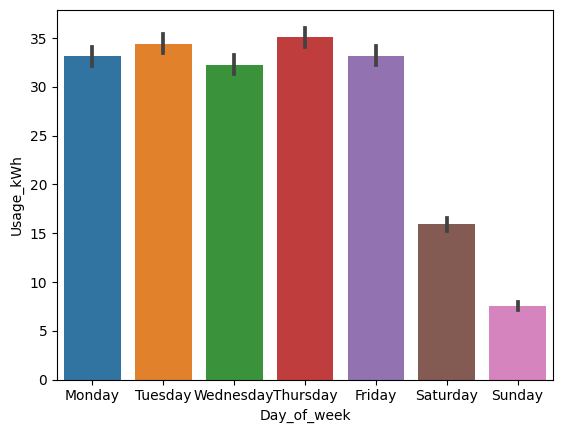

In [35]:
sns.barplot(x = df["Day_of_week"] , y = df["Usage_kWh"])

# prediction of nsm over energy distribution 

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
X = df.iloc[:,[5,1,2,3,4]]
y = df.iloc[:,6]
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)




# Coefficients and intercept
print("Coefficients (Slope):", model.coef_)
print("Intercept:", model.intercept_)


Coefficients (Slope): [-115.17951673  279.92651179 -297.51498775  391.70773592  413.81651854]
Intercept: 13818.54397864324
